## Création d'un réseau de neurones pour faire de la reconnaissance d'images

In [5]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
from sklearn.preprocessing import StandardScaler

from PIL import Image
from skimage.color import rgb2gray
from skimage import transform

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)
def prepare_img(img):
    img = np.array(img)

    img = 1 - transform.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img[0]
    img2 = np.zeros((IMAGE_SIZE,IMAGE_SIZE))
    for i in range(IMAGE_SIZE):
        for j in range(IMAGE_SIZE):
            img2[i][j] = img[i][j].mean()

    imgs = np.array(img2).reshape(-1,IMAGE_SIZE*IMAGE_SIZE)
    imgs = imgs.astype(float)
    #imgs = scaler.fit_transform(imgs)
    mean = imgs[0].mean()
    std = imgs[0].std()
    imgs[0] = (imgs[0]-mean)/std
    
    return imgs

### Jeu de données

In [6]:
# Image size : 28 x 28
IMAGE_SIZE = 28

# Get only a subpart of the dataset
MAX_IMAGES = 60000

In [7]:
# Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

images = images[:MAX_IMAGES]
targets = targets[:MAX_IMAGES]

# Convert to float
images = images.astype(float)
images_test = images_test.astype(float)

images = Tableau de vecteurs de valeurs réelles (float)  
images_test = Tableau de vecteurs de valeurs réelles (float)

Ressemblant à :  

| X | X | X | 28 colonnes en tout | X |  
| X | X | X | ................................ | X |  
| X | X | X | ................................ | X |  
| 28 lignes en tout  ..........................                 |  
| X | X | X | ................................ | X |  


## Normalisation des données et aplatissement des images

In [8]:
# normalize datas
scaler = StandardScaler()
images = np.array([scaler.fit_transform(image) for image in images])
images_test = np.array([ scaler.fit_transform(image_test) for image_test in images_test])

# Reshape the dataset and convert to float
images = images.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)

images_test = images_test.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)

#globmean = images.mean()
#globstd = images.std()

print(images.shape)
print(targets.shape)

(60000, 784)
(60000,)


images = Vecteur de valeurs réelles (float)  
images_test = Vecteurs de valeurs réelles (float)

images = Tableau de vecteurs de valeurs réelles (float)  
images_test = Tableau de vecteurs de valeurs réelles (float)

Ressemblant à :  

| X | X | X | 28 x 28 = 784 colonnes en tout | X |

## Vérification d'une image

In [9]:
# Choix de l'image 
INDEX = 1000

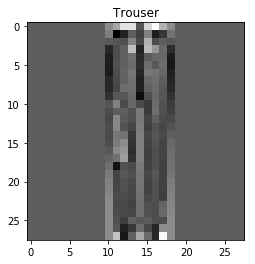

In [10]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot one image
plt.imshow(np.reshape(images[INDEX], (IMAGE_SIZE, IMAGE_SIZE)), cmap="binary")
plt.title(targets_names[targets[INDEX]])
plt.show()

## Création du modèle

In [11]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones

In [12]:
# Add the layers

## 1 / 3 * IMAGE_SIZE * IMAGE_SIZE
model.add(tf.keras.layers.Dense(256, activation="relu"))

## 1 / 3 * IMAGE_SIZE * IMAGE_SIZE * 1 / 2  
model.add(tf.keras.layers.Dense(128, activation="relu"))

## 10
model.add(tf.keras.layers.Dense(10, activation="softmax"))

## Exemple de prédiction sans entraînement sur une liste d'images

In [13]:
model_output = model.predict(images[0:1])
print(model_output)
print(targets[0:1])
print("Found : ", targets_names[index_max(list(model_output[0]))])
print("Should be : ", targets_names[targets[0:1][0]])

Instructions for updating:
Colocations handled automatically by placer.
[[0.60370284 0.11368873 0.0285194  0.03373437 0.01940954 0.02173578
  0.00838379 0.0811241  0.03729659 0.05240482]]
[9]
Found :  T-shirt/top
Should be :  Ankle boot


Par exemple :
    
[[0.0442339  0.4690514  0.03075482 0.057488   0.06961647 0.0077048
  0.212597   0.0625191  0.03022248 0.01581203]]  
[9]    
Found :  Trouser  
Should be :  Ankle boot
   
signifie :
* 46,9 % (0.4690514) de chance qu'il s'agisse du targets_names[1] (Trouser)
* 9 signifie que cela devrait être targets_names[9] (Ankle boot)

## Résumé du modèle (couches de neurones)

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [15]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [16]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 376us/sample - loss: 0.5853 - acc: 0.8002 - val_loss: 0.4375 - val_acc: 0.8443
Epoch 2/10
48000/48000 [==============================] - 17s 349us/sample - loss: 0.3939 - acc: 0.8593 - val_loss: 0.4023 - val_acc: 0.8544
Epoch 3/10
48000/48000 [==============================] - 17s 358us/sample - loss: 0.3465 - acc: 0.8756 - val_loss: 0.3703 - val_acc: 0.8667
Epoch 4/10
48000/48000 [==============================] - 17s 358us/sample - loss: 0.3144 - acc: 0.8860 - val_loss: 0.3622 - val_acc: 0.8701
Epoch 5/10
48000/48000 [==============================] - 17s 346us/sample - loss: 0.2897 - acc: 0.8965 - val_loss: 0.3562 - val_acc: 0.8725
Epoch 6/10
48000/48000 [==============================] - 17s 351us/sample - loss: 0.2696 - acc: 0.9043 - val_loss: 0.3603 - val_acc: 0.8726
Epoch 7/10
48000/48000 [==============================] - 16s 341us/sample - loss: 0.2506 - acc: 0.9116 

epochs = nombre de parcours du jeu d'entraînement  
validation_split = proportion des données de validation sur le jeu d'entraînement

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

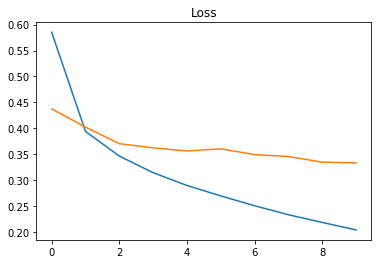

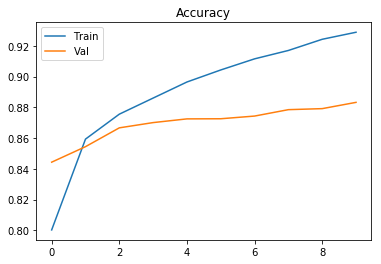

In [17]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## Le modèle est-il bien entraîné ?

In [18]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 1s 110us/sample - loss: 0.3533 - acc: 0.8737
Test Loss 0.35325726807117463
Test Accuracy 0.8737


## ------------------------------------------------------------

## Travail sur l'image trouvée :  
* on redimensionne
* on normalise
* on "applatit"  l'image

In [33]:
IMAGE_PATH = 'sac.jpg'
#IMAGE_PATH = 'sac2.jpg'
#IMAGE_PATH = 'dress.jpeg'
#IMAGE_PATH = 'sandal.jpeg'
#IMAGE_PATH = 'trouser.jpeg'
#IMAGE_PATH = 'sneaker.jpeg'
#IMAGE_PATH = 'coat.jpeg'
#IMAGE_PATH = 'ankle_boot.jpeg'
#IMAGE_PATH = 'Tshirt.jpeg'


In [34]:
img = Image.open(IMAGE_PATH)

imgs = prepare_img(img)
model_output = model.predict(imgs)
df = pd.DataFrame([ round(out,2) for out in model_output[0]]).T
df.columns = targets_names
print("Found : %s" %(targets_names[index_max(list(model_output[0]))] + '  ' + str(round(max(list(model_output[0]))*100,2)) +' %'))
df

Found : Pullover  44.13 %


T-shirt/top  Trouser  Pullover  Dress  Coat  Sandal  Shirt  Sneaker   Bag  \
0          0.0      0.0      0.44   0.01  0.16     0.0   0.29      0.0  0.09   

   Ankle boot  
0         0.0

Text(0.5, 1.0, 'Pullover  44.13 %')

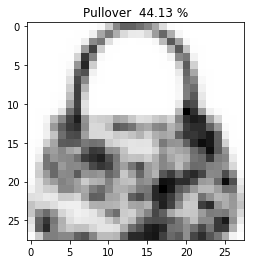

In [35]:
# Plot one image
plt.imshow(np.reshape(imgs[0], (IMAGE_SIZE, IMAGE_SIZE)), cmap="binary")
title = targets_names[index_max(list(model_output[0]))] + '  ' + str(round(max(list(model_output[0]))*100,2)) +' %'
plt.title(title)

## Trouvez des images sur internet et testez le réseau de neurones

# -----------------------------------------------------------------------

## Exercice :
### Voici une base de données de chiffres écrits à la main, créer le réseau de neurones permettant la reconnaissance de ces chiffres, testez-le sur le jeu de test, puis sur des chiffres écrits par vous-même

## Jeu de données

In [22]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

5


(60000, 28, 28)

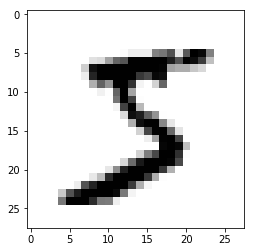

In [23]:
plt.imshow(x_train[0], cmap='binary')
print(y_train[0])
x_train.shape

In [ ]:
Résumé de l'entraînement :
comparaison des données d'entraînement et de validation